In [2]:
import os
import json
import matplotlib.pyplot as plt
import cv2
import shutil
import pydicom

In [3]:
json_data = 'annotations/cleaned_sampled_seed4.json'

json_object = json.load(open(json_data, "r"))

In [14]:
# weird data

weird_list = ['2324155_-20130219CT0007_-3_-1.3.12.2.1107.5.1.4.50396.30000013021901272400000010590_-1.3.12.2.1107.5.1.4.50396.30000013021901272400000010590.jpg',
              '2324155_-20130219CT0007_-3_-1.3.12.2.1107.5.1.4.50396.30010313021902190113500039969_-1.3.12.2.1107.5.1.4.50396.30010313021902190113500039969.jpg',
              '2324155_-20130219CT0007_-6_-1.3.12.2.1107.5.1.4.50396.30010313021902190113500030186_-1.3.12.2.1107.5.1.4.50396.30010313021902190113500030186.jpg']

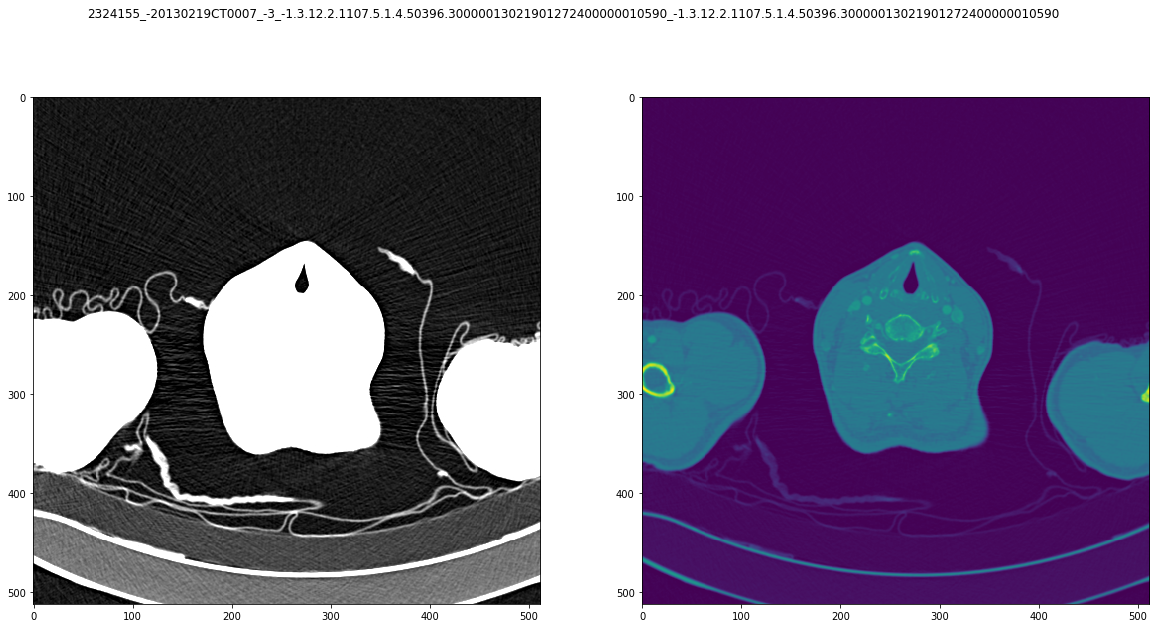

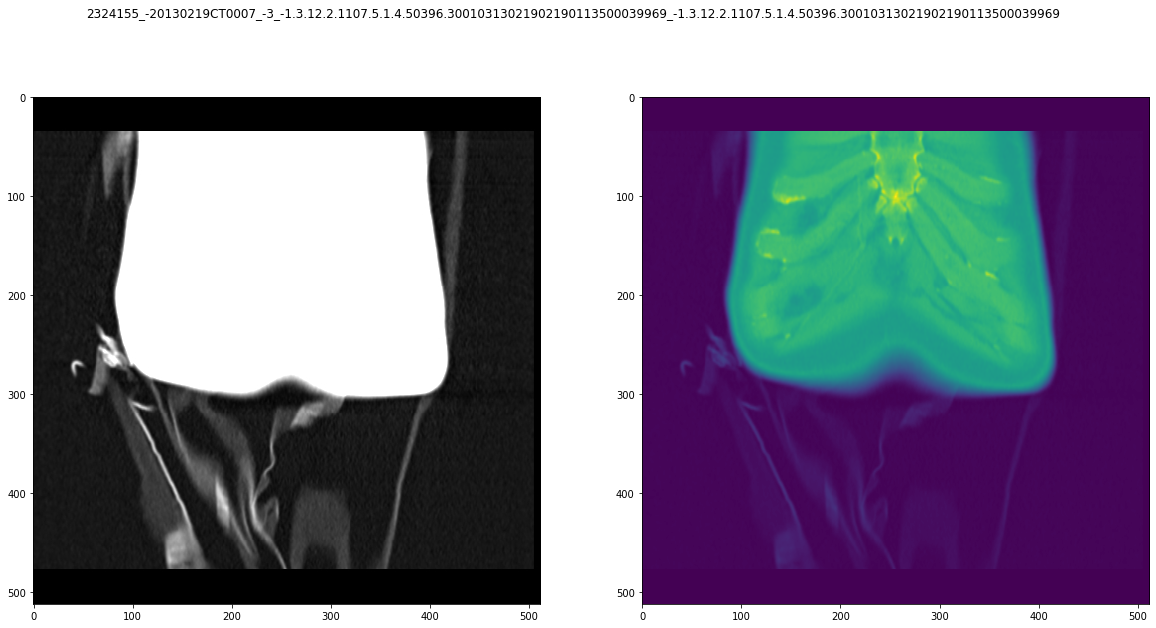

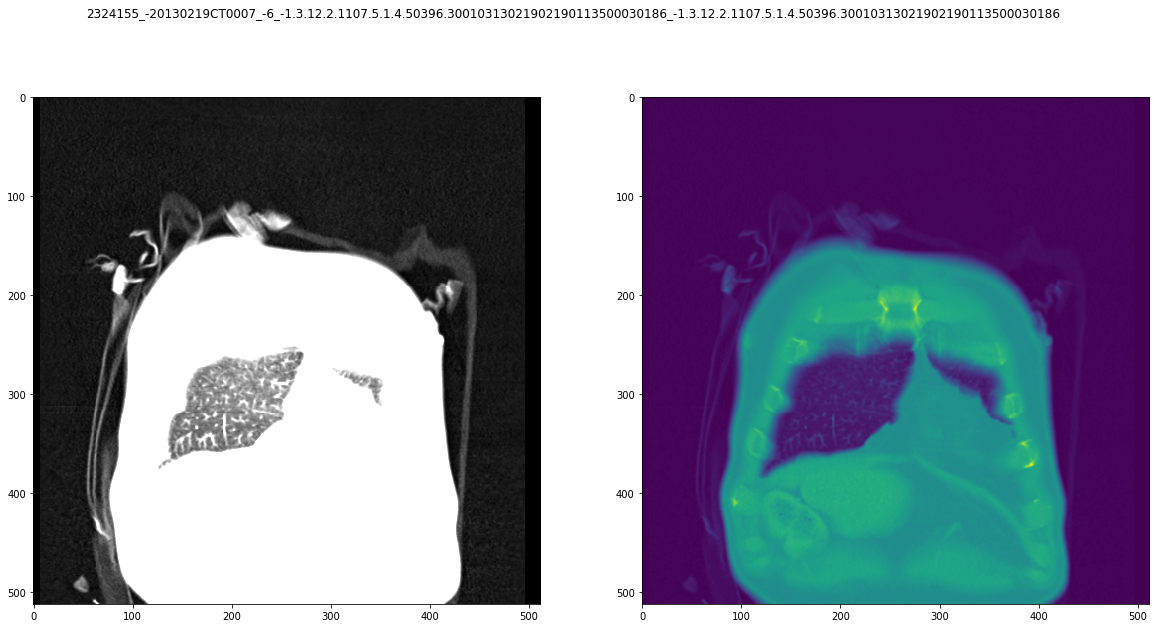

In [15]:
c = 0

for k,v in json_object.items():
    
    if k in weird_list:
        fig = plt.figure(figsize=(20,10))
        fig.suptitle(k[:-4])
        # Get dataset type
        data_type = v['set']

        #zone = data_type.split("_")[0].strip()
        #pos_neg = data_type.split("_")[-1].strip()
        '''
        if pos_neg == 'lesions':
            file_path = dataset_path + zone +"/lesions/"
        f pos_neg == 'controls':
            file_path = dataset_path + zone +"/negative_controls/"

        file_path += k
        '''
        #regions = v['regions']
        jpg_file_path  = v['jpg_img_path']
        dicom_file_path = v['DICOM_img_path']
        #print(file_path)
        jpg_img = cv2.imread(jpg_file_path)
        jpg_img = cv2.cvtColor(jpg_img, cv2.COLOR_BGR2RGB)

        ds  = pydicom.dcmread(dicom_file_path)
        ds.decompress()
        dicom_img = ds.pixel_array

        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(jpg_img)
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(dicom_img)

        c+= 1
       # if c > 10:
            #break

        plt.show()